In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [4]:
base = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls'
                     ,encoding="latin1"
                     ,skiprows=4
                     ,nrows=348)

In [5]:
less_base = base.drop(['Violent\ncrime','Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
          'Aggravated\nassault', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],axis=1)

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [7]:
less_base.columns = ['city', 'population', 'murder','robbery','property_crime']
less_base["pop_squared"] = less_base.population**2
less_base = less_base.fillna(0)
less_base = less_base.reset_index()


In [8]:
less_base["murder_bool"] = less_base.murder>0
less_base["robbery_bool"] = less_base.robbery>0

In [10]:
for_reg = less_base.sort_values("population")
y = for_reg[["property_crime"]]
x = for_reg[[ 'population',"pop_squared", 'murder_bool','robbery_bool']]

In [11]:
for_reg[[ 'population',"pop_squared", 'murder_bool','robbery_bool']].corr()

,population,pop_squared,murder_bool,robbery_bool
population,1.000,0.998,0.162,0.064
pop_squared,0.998,1.000,0.133,0.044
murder_bool,0.162,0.133,1.000,0.313
robbery_bool,0.064,0.044,0.313,1.000


Coefficients: 
 [[ 3.46570268e-02 -2.11108019e-09  1.51866535e+01 -9.62774363e+01]]
Intercept: 
 [-109.57533562]
0.9961247104988709


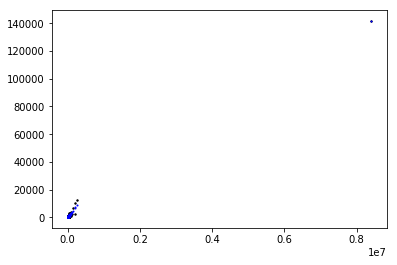

In [14]:
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(x, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print(regr.score(x, y))
# Plot outputs
plt.scatter(for_reg.population,y, color='black',s=2)
plt.scatter(for_reg.population, regr.predict(x), color='blue',s=1)
plt.show()

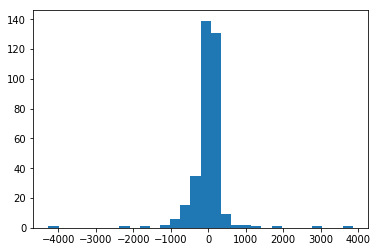

In [15]:
residual = y - regr.predict(x)
plt.hist(residual.property_crime,bins=30);